In [1]:
import pandas as pd

In [2]:
people = pd.read_csv("../database/people.csv", encoding='utf-8')
attendance = pd.read_csv("../database/attendance.csv", encoding = 'utf-8')

In [3]:
people = people[["id","name","surname","skills","hobbies"]]
people

,id,name,surname,skills,hobbies
0,107,Bouwina,Jelača,ethics:classify basic film genres:anthropology...,professional dancing:handmade crafts:swimming:...
1,134,Paola,Kasalović,philosophy:roman law:justice system:orthograph...,volleyball:skiing:gardening:swimming:basketbal...
2,40,Kaja,Dolovac,human biology:mathematics and informatics-teac...,horseback riding:cooking:skiing:volleyball:net...
3,45,Josip,Biberčić,roman law:roman private law:legal systems:deat...,knitting:gardening:volunteering:basketball:gro...
4,133,Astrid,Dapčević,botany and zoology:toxicology:nuclear physics:...,football:netflix:swimming:gym:skiing:writing:b...
...,...,...,...,...,...
195,67,Grigor,Bešlagić,automatics:ontology:Croatian dialects:comparat...,volunteering:writing:tennis:group sports:video...
196,7,Lidija,Vukenović,web design:programming:robotics:mechatronics:m...,swimming:diving:skiing:basketball:gym:knitting...
197,150,Nera,Antić,ethics:psychology of pain:Croatian dialects:ba...,volunteering:writing:knitting:football:reading...
198,165,Fran,Rovinac,electroenergetics:fluid mechanics:computationa...,beekeeping:group sports:translating:football:c...


In [4]:
attendance = attendance[["person_id", "grade"]]
attendance

,person_id,grade
0,107,2.01
1,134,2.95
2,40,3.46
3,45,2.62
4,133,3.18
...,...,...
195,67,4.34
196,7,2.34
197,150,2.46
198,165,2.34


In [5]:
def count(string_sep, sep = ":"):
    return len(string_sep.split(":"))

In [6]:
for el in people["skills"]:
    people.replace(el, count(el), inplace=True) 

In [7]:
for el in people["hobbies"]:
    people.replace(el, count(el), inplace=True)

array([[<AxesSubplot:title={'center':'skills'}>]], dtype=object)

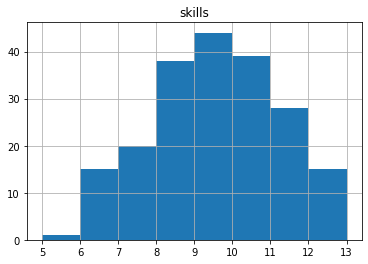

In [8]:
people.hist("skills", bins=(people["skills"].max()-people["skills"].min()))

array([[<AxesSubplot:title={'center':'hobbies'}>]], dtype=object)

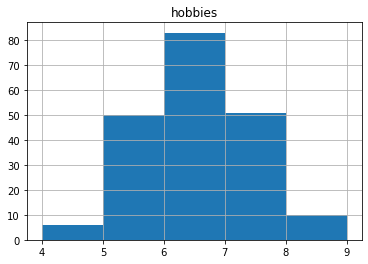

In [9]:
people.hist("hobbies", bins=(people["hobbies"].max()-people["hobbies"].min()))

In [10]:
people = people.set_index('id')

In [11]:
people = people.merge(attendance, left_index=True, right_on='person_id')

In [12]:
people

,name,surname,skills,hobbies,person_id,grade
0,Bouwina,Jelača,7,8,107,2.01
1,Paola,Kasalović,9,7,134,2.95
2,Kaja,Dolovac,11,6,40,3.46
3,Josip,Biberčić,7,7,45,2.62
4,Astrid,Dapčević,9,7,133,3.18
...,...,...,...,...,...,...
195,Grigor,Bešlagić,12,5,67,4.34
196,Lidija,Vukenović,6,8,7,2.34
197,Nera,Antić,10,7,150,2.46
198,Fran,Rovinac,6,5,165,2.34


<AxesSubplot:xlabel='grade'>

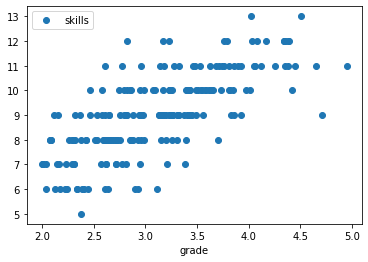

In [13]:
people.plot(x='grade', y='skills', style='o')